In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Parameters

In [2]:
# Number of data samples
n = 1

# Dimensions per sample
d = 8

In [3]:
# random seed for reproducibility
np.random.seed(0)

# original data vectors
x, y, z = np.random.randn(3, d)

# u, v, vectors for convenience
u = x - y
v = x - z

# weight vector initialization
w = np.random.randn(d)

In [4]:
def func(w, u, v, alpha):
    return max(0, np.abs(w@u) - np.abs(w@v) + alpha)

def func_grad(w, u, v, a):
    pass

def smooth_norm(w, x, beta):
    return np.sqrt((w@x)**2 + beta**2) - beta

def smooth_func(w, u, v, alpha, beta, mu):
    return mu * np.log(
        np.exp((1/mu)*(smooth_norm(w, u, beta) + alpha)) +
        np.exp((1/mu)*smooth_norm(w, v, beta))
    ) - smooth_norm(w, v, beta)

In [5]:
alpha = 1
beta = 1
mu = 1

r = func(w, u, v, alpha)
rs = smooth_func(w, u, v, alpha, beta, mu)

print(r, rs)

1.321101603546889 1.549910693577015


<IPython.core.display.Javascript object>


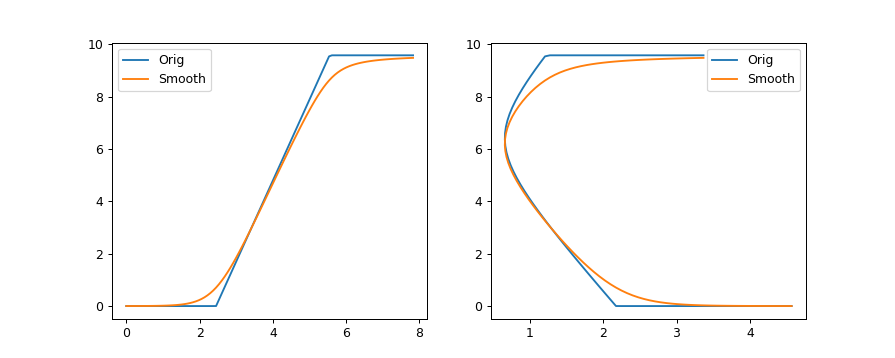

In [6]:
np.random.seed(0)

alpha = 1
beta = 1
mu = 1

w = np.random.randn(d)
y, z = np.random.randn(2, d)
s = 100

un_list, vn_list = [], []
r_list = []
rs_list = []
# Try z, 2z
for x in np.linspace(y, 2*z, s):
    # u, v, vectors for convenience
    u = x - y
    v = x - z
    
    r = func(w, u, v, alpha)
    rs = smooth_func(w, u, v, alpha, beta, mu)
    un_list.append(np.linalg.norm(u))
    vn_list.append(np.linalg.norm(v))
    r_list.append(r)
    rs_list.append(rs)
    
fig, (u_ax, v_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

u_ax.plot(un_list, r_list, label='Orig')
u_ax.plot(un_list, rs_list, label='Smooth')
u_ax.legend()

v_ax.plot(vn_list, r_list, label='Orig')
v_ax.plot(vn_list, rs_list, label='Smooth')
v_ax.legend()

plt.show()

### Loss Surface for n=1

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


<IPython.core.display.Javascript object>


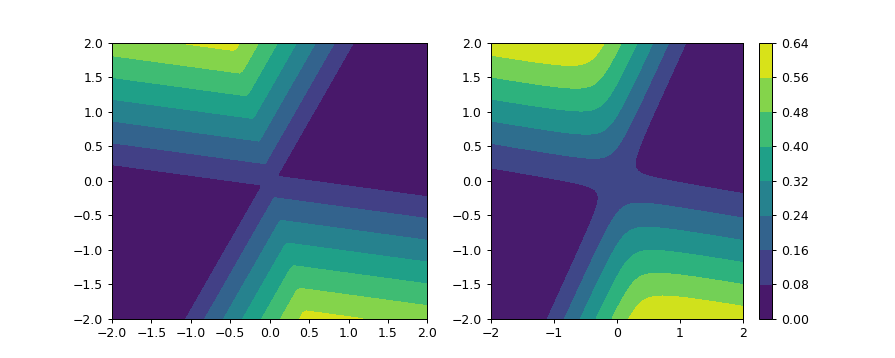

In [20]:
# Dimensions per sample
d = 2

np.random.seed(1)

alpha = 0.1
beta = 0.05
mu = 0.05

w = np.random.rand(d)
x, y, z = np.random.rand(3, d, 1)
s = 100

u = x - y
v = x - z

_w1 = np.linspace(-2, 2, s)
_w2 = np.linspace(-2, 2, s)

w1, w2 = np.meshgrid(_w1, _w2)

#print(w1.shape, w2.shape)

w = np.stack([w1, w2]).reshape(2, s*s).T

def func_md(w, u, v, alpha):
    return np.maximum(0, np.abs(w@u) - np.abs(w@v) + alpha)

def smooth_norm_md(w, x, beta):
    return np.sqrt((w@x)**2 + beta**2) - beta

def smooth_func_md(w, u, v, alpha, beta, mu):
    return mu * np.log(
        np.exp((1/mu)*(smooth_norm(w, u, beta) + alpha)) +
        np.exp((1/mu)*smooth_norm(w, v, beta))
    ) - smooth_norm(w, v, beta)

r = func_md(w, u, v, alpha).reshape(s, s)
print(w1.shape, w2.shape, r.shape)

rs = smooth_func_md(w, u, v, alpha, beta, mu).reshape(s, s)
print(w1.shape, w2.shape, rs.shape)


fig, (orig_ax, smooth_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

h = orig_ax.contourf(w1, w2, r)
hs = smooth_ax.contourf(w1, w2, rs)

fig.colorbar(h)
plt.show()

#print(w1.shape, w2.shape)

<IPython.core.display.Javascript object>


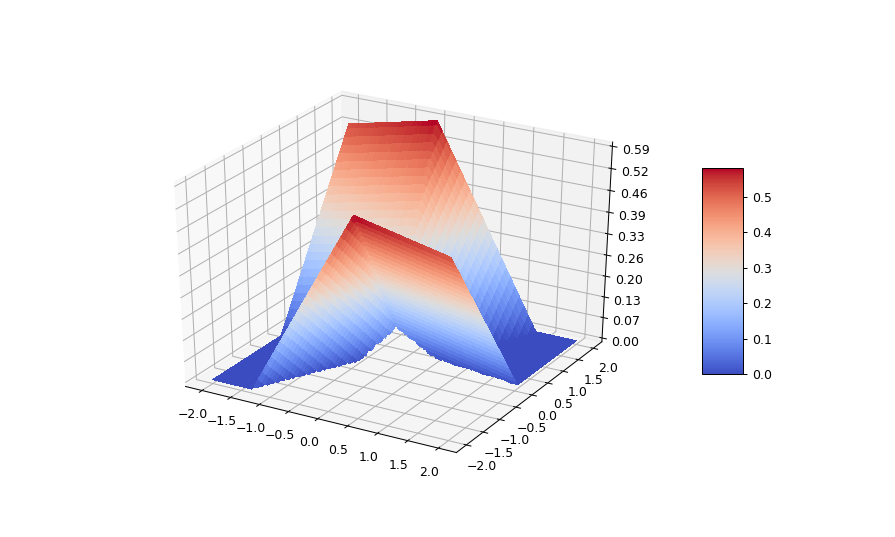

<IPython.core.display.Javascript object>


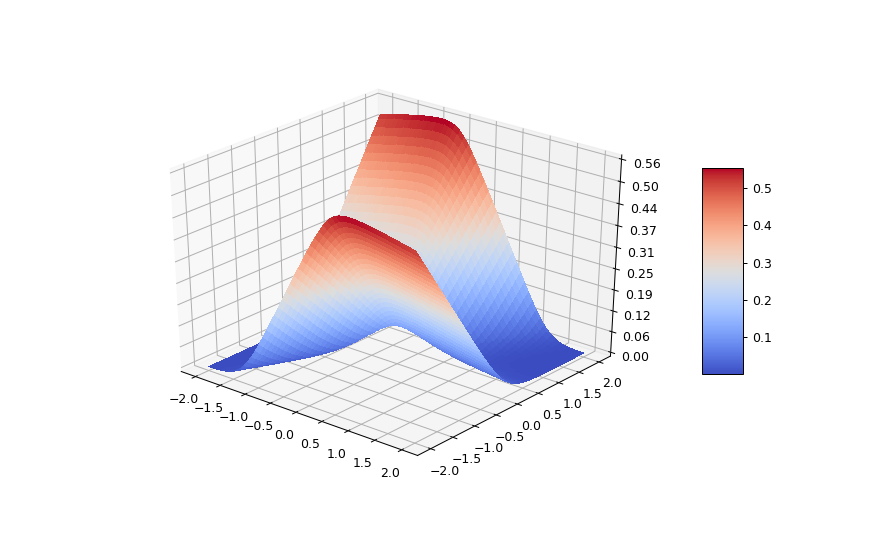

In [21]:
orig_fig_3d = plt.figure(figsize=(10, 6))
orig_ax_3d = orig_fig_3d.gca(projection='3d')

# Plot the surface.
orig_surf = orig_ax_3d.plot_surface(w1, w2, r, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#orig_ax_3d.set_zlim(-1.01, 1.01)
orig_ax_3d.zaxis.set_major_locator(LinearLocator(10))
orig_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
orig_fig_3d.colorbar(orig_surf, shrink=0.5, aspect=5)

####

smooth_fig_3d = plt.figure(figsize=(10, 6))
smooth_ax_3d = smooth_fig_3d.gca(projection='3d')

# Plot the surface.
smooth_surf = smooth_ax_3d.plot_surface(w1, w2, rs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#smooth_ax_3d.set_zlim(-1.01, 1.01)
smooth_ax_3d.zaxis.set_major_locator(LinearLocator(10))
smooth_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
smooth_fig_3d.colorbar(smooth_surf, shrink=0.5, aspect=5)

plt.show()

### Loss Surface for $n \geq 1$

(3, 2, 96)


<IPython.core.display.Javascript object>


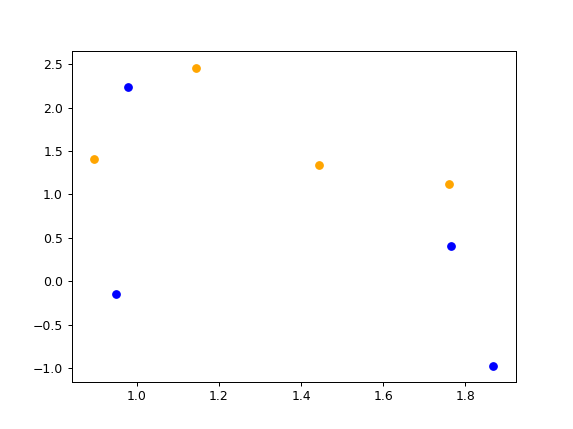

In [231]:
import itertools

np.random.seed(0)

# Number of data samples
# 5 rand, 12 randn
n = 4
# Dimensions per sample
d = 2

alpha = 0.1
beta = 0.05
mu = 0.05

if False:
    X, Y, Z = np.random.rand(3, d, n)
    print(X.shape, Y.shape, Z.shape)
else:
    _X, _Y = np.random.randn(2, n, d)
    _Y = _Y + 1
    # gen triplets
    cx = np.array(list(itertools.combinations(_X, 2)))
    cy = np.array(list(itertools.combinations(_Y, 2)))
    #print(_X.shape)
    #print(cx.shape, _Y.shape)
    t_list = []
    
    for x in cx:
        for y in _Y:
            t1 = np.concatenate([x, y.reshape(1, d)])
            t2 = np.concatenate([x[::-1, :], y.reshape(1, d)])
            t_list.append(t1)
            t_list.append(t2)
            
    for y in cy:
        for x in _X:
            t1 = np.concatenate([y, x.reshape(1, d)])
            t2 = np.concatenate([y[::-1, :], x.reshape(1, d)])
            t_list.append(t1)
            t_list.append(t2)
            
    t_arr = np.stack(t_list, axis=2)
    X, Y, Z = t_arr
    print(t_arr.shape)
    
    fig, ax = plt.subplots()
    ax.scatter(*_X.T, color='blue')
    ax.scatter(*_Y.T, color='orange')
    
    # Plot line w.T@x = 0
    
    plt.show()

#fig, ax = plt.subplots()
#ax.scatter(*zip(X), color='b')
#ax.scatter(*zip(Y), color='g')
#ax.scatter(*zip(Z), color='orange')
#plt.show()

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


<IPython.core.display.Javascript object>


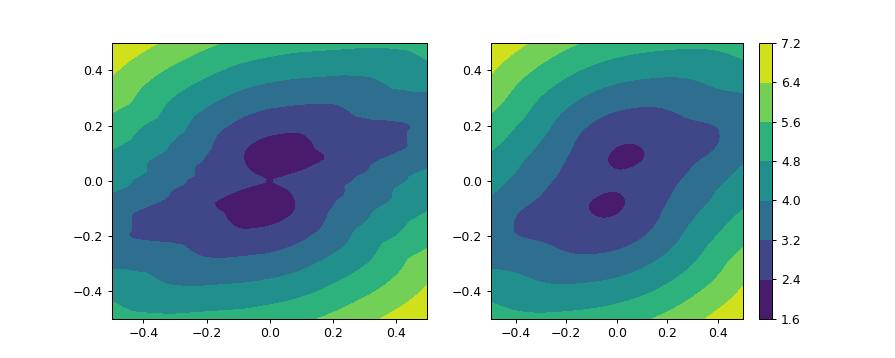

In [232]:
s = 100

U = X - Y
V = X - Z

_w1 = np.linspace(-0.5, 0.5, s)
_w2 = np.linspace(-0.5, 0.5, s)

w1, w2 = np.meshgrid(_w1, _w2)

w = np.stack([w1, w2]).reshape(2, s*s).T

def func_md_nd(w, U, V, alpha):
    t = np.zeros(s*s)
    for u, v in zip(U.T, V.T):
         t += np.maximum(0, np.abs(w@u) - np.abs(w@v) + alpha)
    return (1 / n) * t

def smooth_func_md_nd(w, U, V, alpha, beta, mu):
    t = np.zeros(s*s)
    for u, v in zip(U.T, V.T):
        t +=  mu * np.log(
            np.exp((1/mu)*(smooth_norm(w, u, beta) + alpha)) +
            np.exp((1/mu)*smooth_norm(w, v, beta))
        ) - smooth_norm(w, v, beta)
    return (1 / n) * t

r = func_md_nd(w, U, V, alpha).reshape(s, s)

print(w1.shape, w2.shape, r.shape)

rs = smooth_func_md_nd(w, U, V, alpha, beta, mu).reshape(s, s)
print(w1.shape, w2.shape, rs.shape)


fig, (orig_ax, smooth_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

h = orig_ax.contourf(w1, w2, r)
hs = smooth_ax.contourf(w1, w2, rs)

fig.colorbar(h)
plt.show()

#print(w1.shape, w2.shape)

<IPython.core.display.Javascript object>


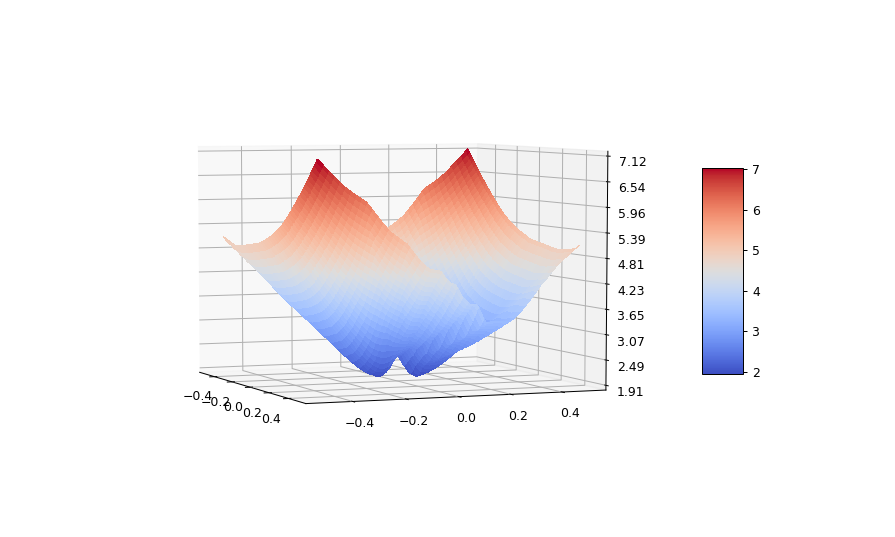

<IPython.core.display.Javascript object>


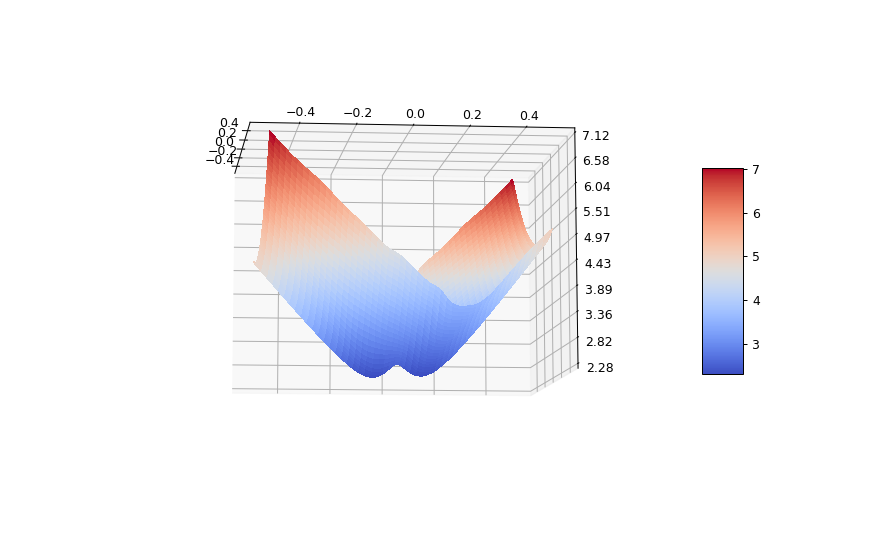

In [233]:
orig_fig_3d = plt.figure(figsize=(10, 6))
orig_ax_3d = orig_fig_3d.gca(projection='3d')

# Plot the surface.
orig_surf = orig_ax_3d.plot_surface(w1, w2, r, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#orig_ax_3d.set_zlim(-1.01, 1.01)
orig_ax_3d.zaxis.set_major_locator(LinearLocator(10))
orig_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
orig_fig_3d.colorbar(orig_surf, shrink=0.5, aspect=5)

####

smooth_fig_3d = plt.figure(figsize=(10, 6))
smooth_ax_3d = smooth_fig_3d.gca(projection='3d')

# Plot the surface.
smooth_surf = smooth_ax_3d.plot_surface(w1, w2, rs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#smooth_ax_3d.set_zlim(-1.01, 1.01)
smooth_ax_3d.zaxis.set_major_locator(LinearLocator(10))
smooth_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
smooth_fig_3d.colorbar(smooth_surf, shrink=0.5, aspect=5)

plt.show()

### Compare loss surface and separating line to SVM loss with penality
- equivalent to robust situation, separates spheres